In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
from scipy import stats

In [2]:
df=pd.read_csv("D:\Data Science\Spark project\project 2\Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.index=df['Id']

In [5]:
df.drop(['Id'],axis=1,inplace=True)

In [6]:
df_final=df.select_dtypes(include=np.number)

In [7]:
df_final.shape[1]

4

<AxesSubplot:>

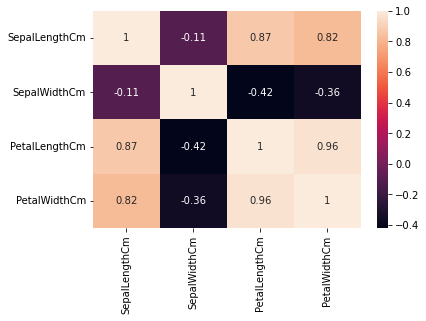

In [8]:
sns.heatmap(df_final.corr(),annot=True)

In [9]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_sc=ss.fit_transform(df_final)

In [10]:
from sklearn.decomposition import PCA 
pca = PCA(n_components =df_sc.shape[1])
pca_data = pca.fit_transform(df_sc)
print('Top 5 eigen values are:', pca.explained_variance_)
print('Top 5 eigen vectors are:', pca.components_)


Top 5 eigen values are: [2.93035378 0.92740362 0.14834223 0.02074601]
Top 5 eigen vectors are: [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [11]:
from sklearn.cluster import KMeans

223.73200573676323
140.96581663074684
114.36537752920934
91.06677122728526
81.97240913006584
72.27832844695182
63.28710109250294
55.59809959504054
47.64619350378635


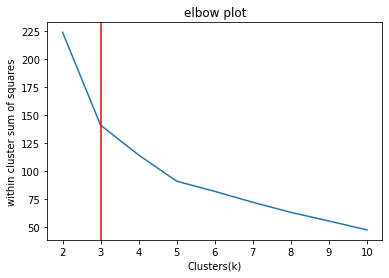

In [12]:
wcss=[]
cl=[2,3,4,5,6,7,8,9,10]
for k in cl:
    mod=KMeans(k)
    mod.fit(pca_data)
    print(mod.inertia_)
    wcss.append(mod.inertia_)
plt.plot(cl,wcss)
plt.title('elbow plot')
plt.xlabel('Clusters(k)')
plt.ylabel('within cluster sum of squares')
plt.axvline(3,color='red')


In [13]:
from sklearn.metrics import silhouette_score
sil=[]
cl=[2,3,4,5,6,7,8,9,10]
for k in cl:
    mod=KMeans(k)
    mod.fit(pca_data)
    score=silhouette_score(df_final,mod.labels_)
    print(score)
    sil.append(score)

0.6863930543445408
0.5059312160513932
0.36600170345441885
0.30888932049498835
0.27124768517884057
0.2495056875844458
0.27911904660841674
0.2550555464054086
0.24630797057767584


In [14]:
from scipy.cluster.hierarchy import dendrogram,linkage
link_mat=linkage(pca_data,method='ward')

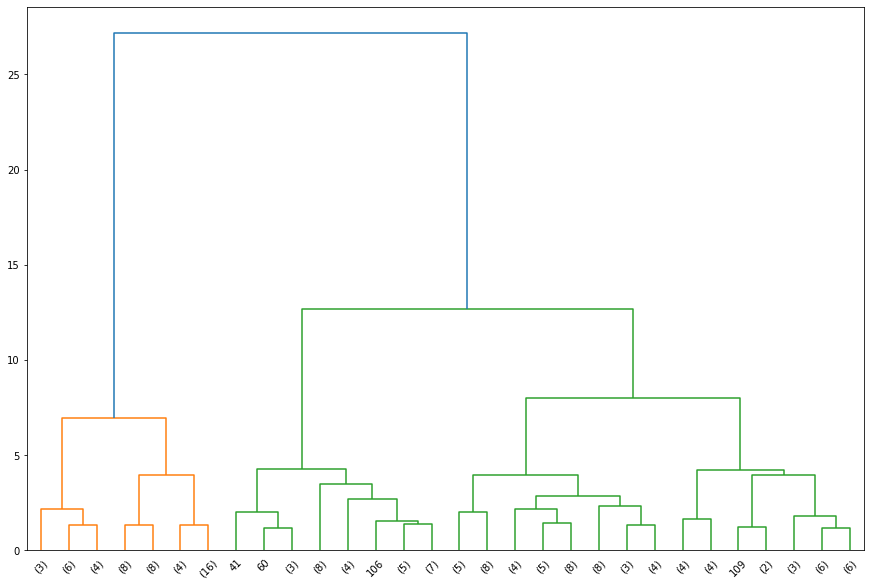

In [15]:
plt.figure(figsize=(15,10))
dendro=dendrogram(link_mat,truncate_mode='lastp')


In [16]:
k=3
mod=KMeans(k)
mod.fit(pca_data)
label=mod.labels_
cluster_data=pd.DataFrame(pca_data,columns=['pc1','pc2','pc3','pc4'])
cluster_data['Label']=label


In [17]:
cluster_data['Label'].value_counts()

0    53
1    50
2    47
Name: Label, dtype: int64

In [28]:
cluster_data

,pc1,pc2,pc3,pc4,Label
0,-2.264542,0.505704,-0.121943,-0.023073,1
1,-2.086426,-0.655405,-0.227251,-0.103208,1
2,-2.367950,-0.318477,0.051480,-0.027825,1
3,-2.304197,-0.575368,0.098860,0.066311,1
4,-2.388777,0.674767,0.021428,0.037397,1
...,...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890,2
146,1.558492,-0.905314,-0.025382,-0.221322,0
147,1.520845,0.266795,0.179277,-0.118903,2
148,1.376391,1.016362,0.931405,-0.024146,2


In [18]:
y_kmeans = mod.fit_predict(pca_data)

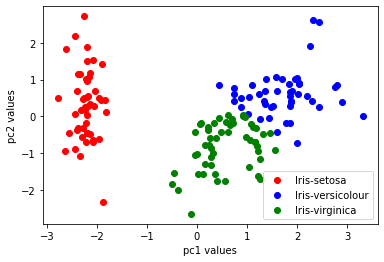

In [54]:
# Visualising the clusters - On the first two columns
plt.scatter(pca_data[y_kmeans == 0,0], pca_data[y_kmeans == 0,1], 
           c = 'red', label = 'Iris-setosa')
plt.scatter(pca_data[y_kmeans == 1,0], pca_data[y_kmeans == 1,1], 
             c = 'blue', label = 'Iris-versicolour')
plt.scatter(pca_data[y_kmeans == 2,0], pca_data[y_kmeans == 2,1],
             c = 'green', label = 'Iris-virginica')
plt.xlabel('pc1 values')
plt.ylabel('pc2 values')
plt.legend()

In [20]:
cent=mod.cluster_centers_

Text(0, 0.5, 'cengtroid values of pc2')

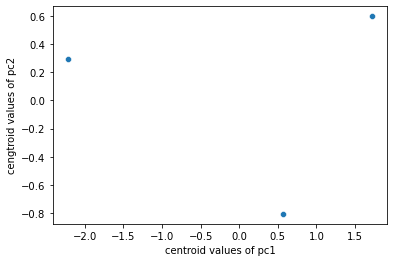

In [57]:
sns.scatterplot(cent[:,0],cent[:,1])
plt.xlabel('centroid values of pc1')
plt.ylabel('cengtroid values of pc2')